In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
Gender={'Male':0,'Female':1}

In [8]:
df = df.replace(Gender)

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [10]:
df.drop('User ID',axis=1,inplace=True)

In [11]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
x_train.shape

(280, 3)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler= MinMaxScaler()

In [18]:
x_scaled = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(x_scaled,y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(x_test_scale)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [23]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [30]:
test=[[0.99,0.22,0.45222]]


In [31]:
pred=lr.predict(test)
pred

array([0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
cf = confusion_matrix(y_pred,y_test)
cr = classification_report(y_pred,y_test)
print(cf)
print(cr)

[[84 12]
 [ 7 17]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        96
           1       0.59      0.71      0.64        24

    accuracy                           0.84       120
   macro avg       0.75      0.79      0.77       120
weighted avg       0.86      0.84      0.85       120



<Axes: >

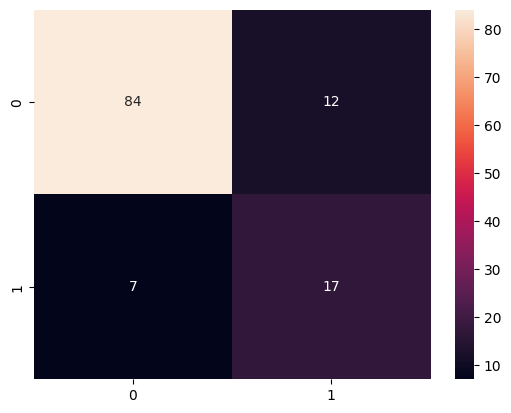

In [34]:
import seaborn as sns
sns.heatmap(cf,annot=True)